### General Imports

In [2]:
import os
import numpy as np
import pandas as pd
import AbstractBaseCollabFilterSGD
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
from train_valid_test_loader import load_train_valid_test_datasets

### Plotting Imports

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots 

import seaborn as sns
sns.set('notebook', font_scale=1.0, style='whitegrid')

### Import Data

In [4]:
train_data_tuple, valid_data_tuple, test_data_tuple, total_n_users, total_n_items = load_train_valid_test_datasets()

In [ ]:
K_candidates = [2, 10, 50]

Num_K = len(K_candidates)

models_dict = dict()

# Loop over K candidates and train model for each
for K in range(len(K_candidates)):
    curK = K_candidates[K]

    # Init model 
    model = CollabFilterOneVectorPerItem(
        n_factors=curK,
        alpha=0.0,
        batch_size=1000,
        n_epochs=500,
        step_size=0.8,
    )

    model.init_parameter_dict(total_n_users, total_n_items, train_data_tuple)
    model.fit(train_data_tuple, valid_data_tuple)

    models_dict[curK] = model

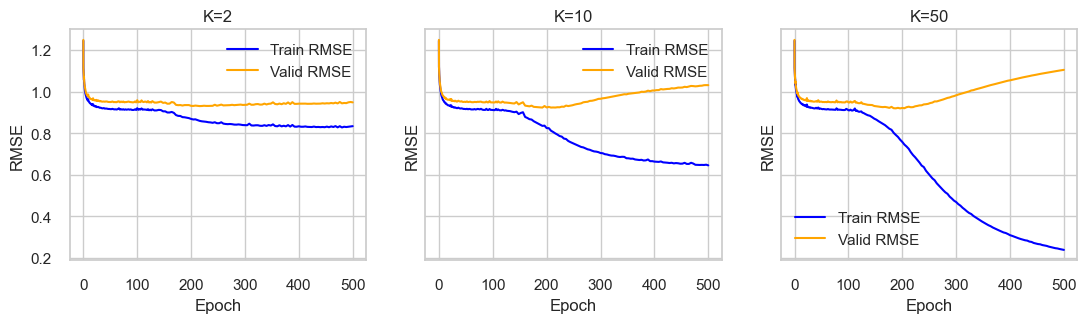

In [ ]:
#  Make trace plots showing RMSE vs. epoch when alpha=0
fig, axgrid = plt.subplots(nrows=1, ncols=Num_K, figsize=(4*Num_K+1,3), sharex=True, sharey=True)
for K in range(len(K_candidates)):
        curK = K_candidates[K]
        model = models_dict[curK]
        
        # Plot train and valid RMSE
        axgrid[K].plot(model.trace_epoch, model.trace_rmse_train, label='Train RMSE', color='blue')
        axgrid[K].plot(model.trace_epoch, model.trace_rmse_valid, label='Valid RMSE', color='orange')
        
        # Set title and labels
        axgrid[K].set_title(f'K={curK}')
        axgrid[K].set_xlabel('Epoch')
        axgrid[K].set_ylabel('RMSE')
        axgrid[K].legend()